In [8]:
import sys
import torch
from collections import Counter
sys.path.append("../src/models")
import train

In [9]:
# Load data
train_loader, val_loader = train.get_dataloaders("../data/processed/normalized_dataset_subset100.pt", 
                                                 batch_size=32)

# Create model
num_classes = len(Counter(val_loader.dataset.tensors[1].tolist())) 
model = train.SimpleCNN(num_classes=num_classes)

# Create a ResNet18 model (pretrained or not)
resnet_model = train.get_resnet18(num_classes=num_classes, pretrained=True)  # or pretrained=False


device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Train both models in a loop
results = {}
for name, m in zip(['SimpleCNN', 'ResNet18'], [model, resnet_model]):
    print(f"Training {name}...")
    train_losses, val_losses, val_accuracies = train.train_model(
        m, train_loader, val_loader, epochs=3, lr=0.0001, device=device
    )
    results[name] = {
        'train_loss': train_losses,
        'val_loss': val_losses,
        'val_acc': val_accuracies
    }

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using mps device
Training SimpleCNN...
Epoch 1/3, Loss: 2.2988, Val Loss: 2.2403, Val Acc: 0.1558
Epoch 2/3, Loss: 2.0826, Val Loss: 2.0453, Val Acc: 0.2572
Epoch 3/3, Loss: 1.8957, Val Loss: 1.9259, Val Acc: 0.2899
Training ResNet18...
Epoch 1/3, Loss: 1.6608, Val Loss: 1.0974, Val Acc: 0.6486
Epoch 2/3, Loss: 0.6123, Val Loss: 0.9189, Val Acc: 0.6957
Epoch 3/3, Loss: 0.2992, Val Loss: 0.8756, Val Acc: 0.7210


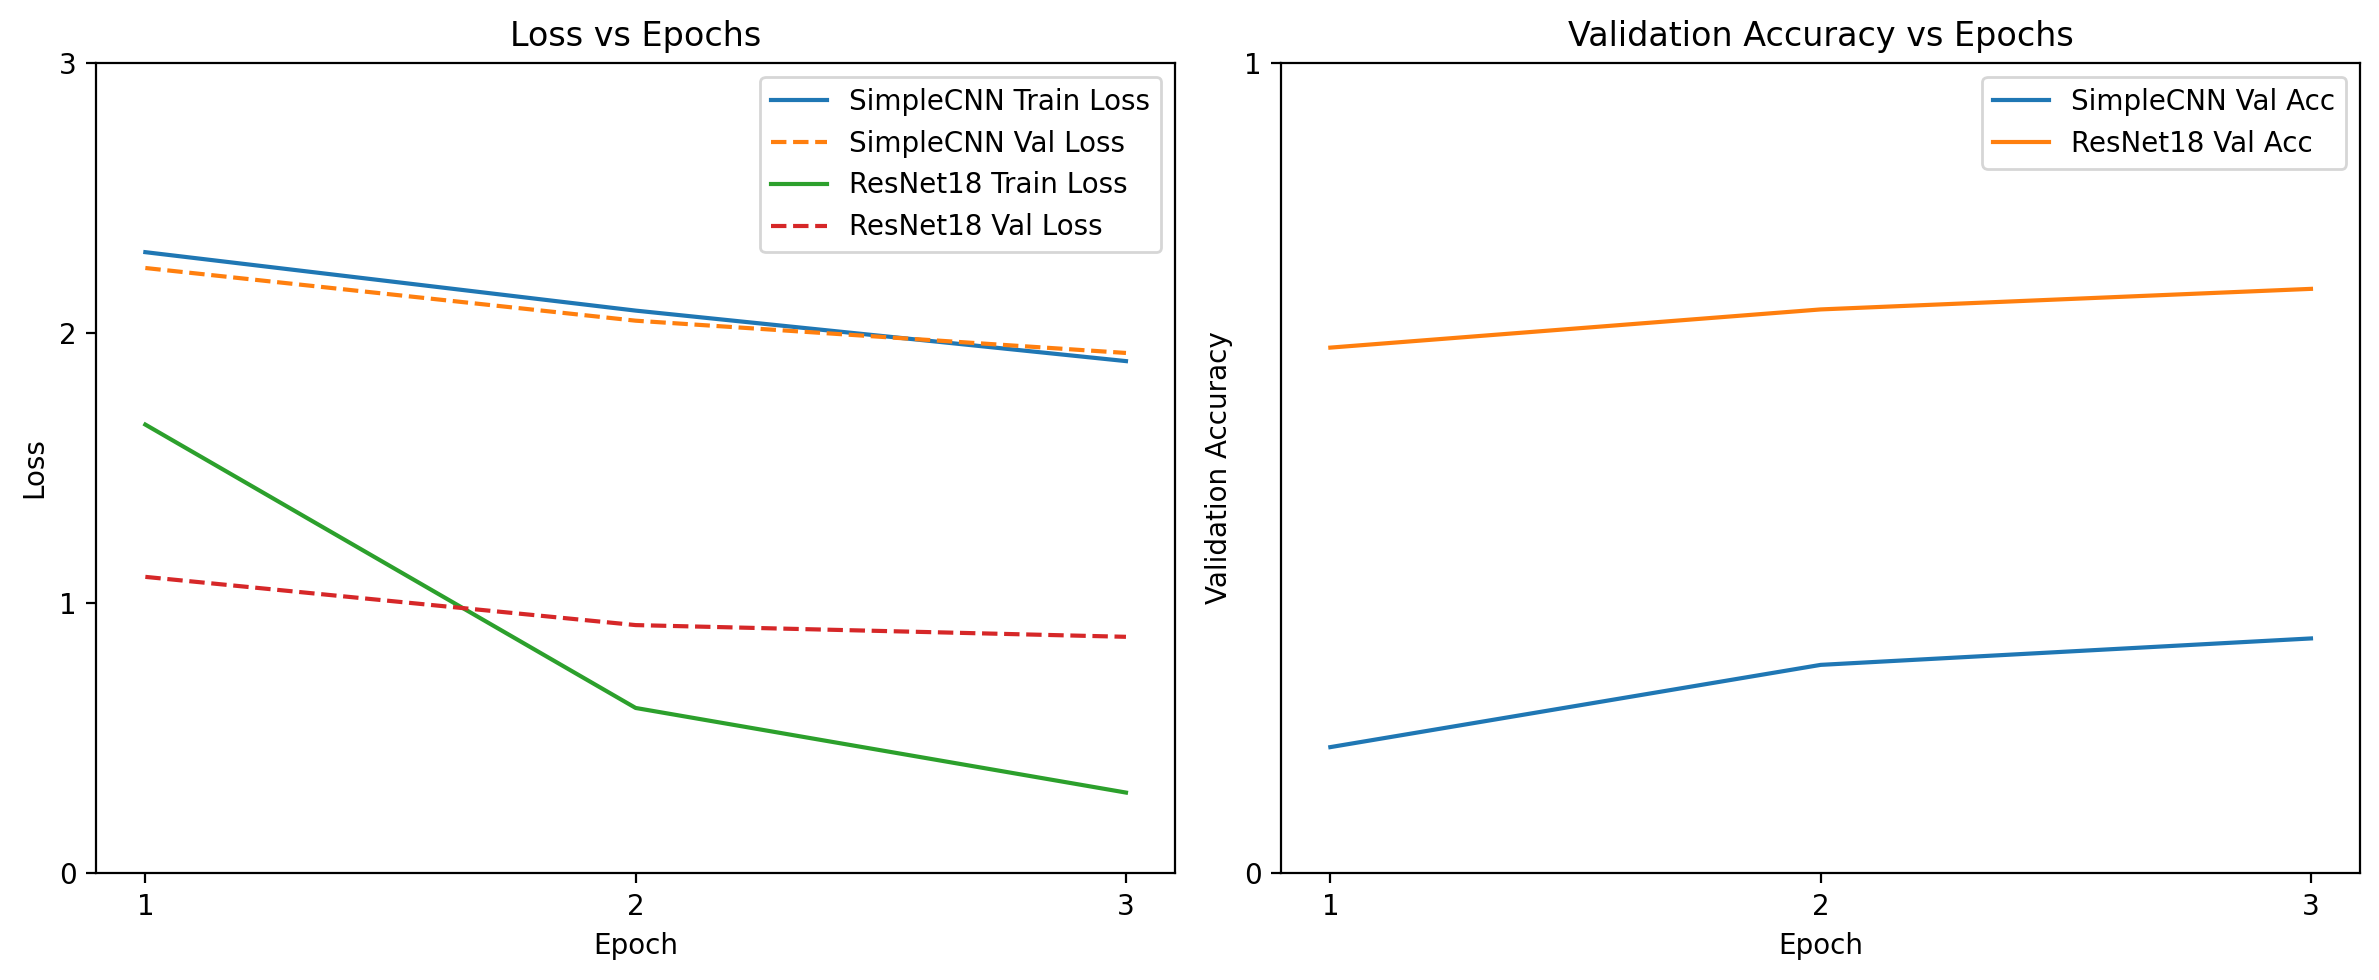

In [12]:
sys.path.append("../src")
import matplotlib.pyplot as plt
from visualization.plot_performance import plot_results

epochs = range(1, len(results['SimpleCNN']['train_loss']) + 1)
plot_results(results=results, epochs=epochs)

Confusion Matrix for SimpleCNN:


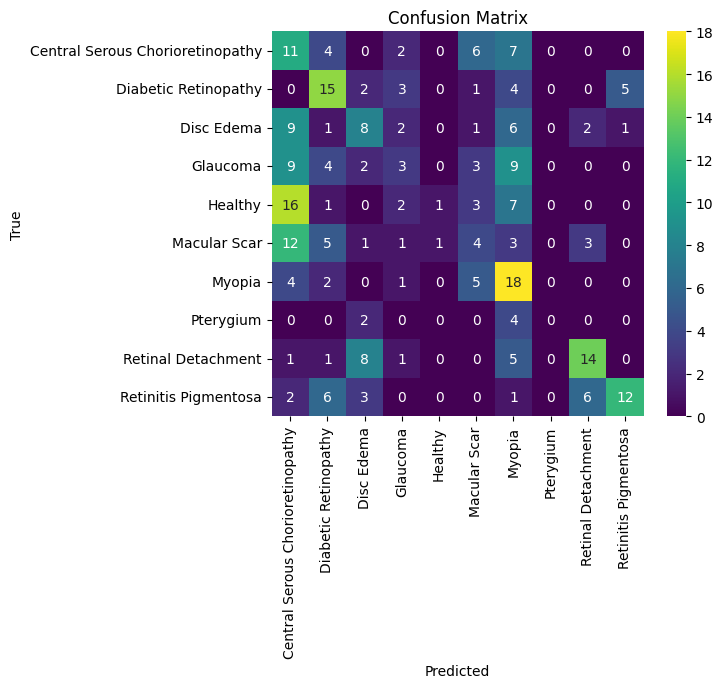

Confusion Matrix for ResNet18:


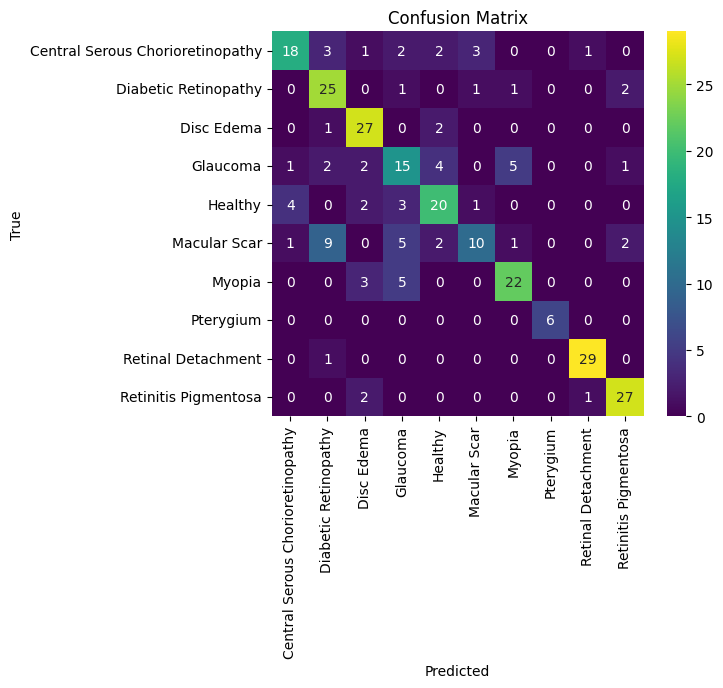

In [13]:
sys.path.append("../src")
from visualization.plot_performance import plot_confusion_matrix


# Classes and assigned index
class_names = {'Central Serous Chorioretinopathy': 0,
               'Diabetic Retinopathy': 1,
               'Disc Edema': 2,
               'Glaucoma': 3,
               'Healthy': 4,
               'Macular Scar': 5,
               'Myopia': 6,
               'Pterygium': 7,
               'Retinal Detachment': 8,
               'Retinitis Pigmentosa': 9}

# For SimpleCNN
print("Confusion Matrix for SimpleCNN:")
plot_confusion_matrix(model, val_loader, class_names.keys(), device=device, normalize=False)

# For ResNet18
print("Confusion Matrix for ResNet18:")
plot_confusion_matrix(resnet_model, val_loader, class_names.keys(), device=device, normalize=False)